# Linear Regression

**_Linear regression_** is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable).

**_Loss function_** is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.

Minimising the loss function means the model is getting more accurate.

We usually use **_Mean Square Error (MSE)_** as the loss function of linear models. It measures the average squared difference between the estimated values and the true value.

The following graph shows the relationship between a single explanatory variable $ x $, a target variable $ y $, the regression line (blue line) and noises (green lines) for each instance.

<img src="img/linear_explaination.png" alt="Graph explaining Linear Regression" height=400px>

_Guidence for understanding equations:_

1. $ i $ is related to $ i $-th instance in the dataset, and $ N $ is the number of instances in the dataset.
2. $ k $ is related to $ k $-th feature in the dataset, and $ K $ is the number of features in the dataset (excluding the target feature $ y $).
3. $ y $ stands for target vector, it has length of $ N $.
4. $ X $ stands for regressor matrix, it has size of $ K * N $.
5. $ β $ stands for coefficient vector, it has length of $ K $.
6. $ ε $ stands for error variable (which takes value for each target in $ y $), it has length of $ N $.
7. $ m $ is related to $ m $-th class in logistic regression, and $ M $ is the number of classes in the regression.
8. Some eqautions have tag numbers at the right hand side, they are facts or results of derivation. Other eqautions without a tag number are steps of derivation.
9. Some equations begin with $ \text{for all } \ldots = \ldots: $, this kind of clause takes effects to the last occurance of the variable or until the definition of variable is replaced by another clause (e.g. summation notation).

## 1. Brief intro to scikit-learn

[scikit-learn](https://scikit-learn.org/stable/index.html) is used for machine learning in Python
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

Installation of scikit-learn
- using either pip:
  ```sh
  python -m venv sklearn-env
  sklearn-env\Scripts\activate  # activate
  pip install -U scikit-learn
  ```
- or conda if you're using anaconda distribution:
  ```sh
  conda create -n sklearn-env -c conda-forge scikit-learn
  conda activate sklearn-env
  ```

Then import modules necessary for machine learning in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import sklearn.linear_model
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

## 2. Simple linear regression

A model with exactly one **_explanatory (independent) variable_** is a simple linear regression.

This relationship is modeled through a **_disturbance term_** or **_error variable_** $ε$, an unobserved random variable that adds "noise" to the linear relationship between the dependent variable $ y $ and regressor variable $ x $. Given a dataset $ \lbrace x_i, y_i \rbrace ^N_{i=1} $, the model takes the form

$$
    \text{for all } i = 1, \ldots, N: \qquad y_i = β_1x_i + β_0 + ε_i \tag{1}
$$

A stardard process of doing linear regression:
1. Load dataset (usually use **pandas**, review workshop 4)
2. Split into regressor matrix $ X $ and target vector $ y $ (usually use **numpy**, review workshop 3)
3. Split into train and test datasets
4. Data preprocessing
5. Instantiate linear regression model
6. Fit train dataset into model
7. Test accuracy of model with test dataset
8. Data and result visualisation (usually **matplotlib.pyplot**, review workshop 5)

_In the first few examples, not all steps are accomplished. In each example we will implement more steps to provide a better learning experience._

gradient: 1.0272835146143353
y-intercept: -6.590622641871214


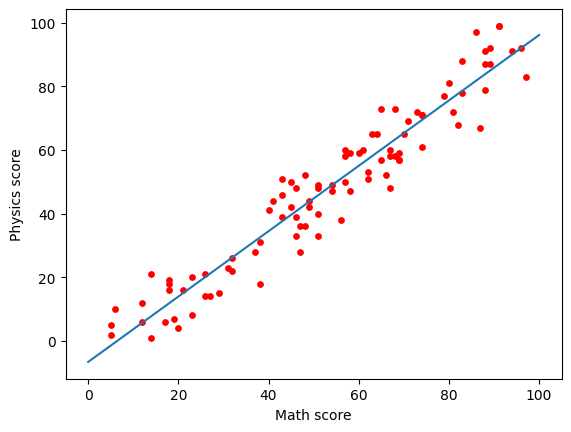

In [2]:
# use synthetic data x-y from data/simple_linear.csv to do a simple linear regression

"""
Synthetic dataset information:
Features: Math and Physics scores, and Physics score is the target.
Number of instances: 95
It is generated by the equation y = X + β0 + ε, where
    y is Physics score,
    X is Math score, comes from discrete uniform distribution U(0, 100),
    β0 = -5 (the y-intercept),
    ε comes from normal distribution N(0, 7.5**2).
"""

# step 1: read csv file
dataset = pd.read_csv("data/simple_linear.csv").to_numpy()

# step 2: split into X and y
X, y = np.split(dataset, [1], axis=1)

# use np or pd to store the data (review the preview workshop x)

# step 5: instantiate linear regression
model = sklearn.linear_model.LinearRegression()

# step 6: fit
model.fit(X, y)

# step 8: visualisation
print(f"gradient: {model.coef_[0][0]:}") # exactly 1.0272835146143353
print(f"y-intercept: {model.intercept_[0]:}") # exactly -6.590622641871214
plt.ylabel("Physics score")
plt.xlabel("Math score")
plt.scatter(X, y, s=15, c="r") # plot all data points in red colour
plt.plot([0, 100], model.predict([[0], [100]])) # draw the best fit line
plt.show()

_Think: what do you notice from the plot?_

## 3. Multiple linear regression

A model with two or more explanatory (independent) variables is a multiple linear regression.

#### **Mathematical definition**

Given a dataset $ \lbrace x_{i1}, \ldots, x_{ik}, y_i \rbrace ^N_{i=1} $, the multiple linear model takes the form

$$
    y = Xβ + ε \tag{2}
$$

where

$$
    y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \qquad
    X = \begin{bmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{bmatrix}
      = \begin{bmatrix}
            1 & x_{11} & \cdots & x_{1k} \\
            1 & x_{21} & \cdots & x_{2k} \\
            \vdots & \vdots & \ddots & \vdots \\
            1 & x_{n1} & \cdots & x_{nk}
        \end{bmatrix}, \qquad
    β = \begin{bmatrix} β_0 \\ β_1 \\ \vdots \\ β_k \end{bmatrix}, \qquad
    ε = \begin{bmatrix} ε_1 \\ ε_2 \\ \vdots \\ ε_n \end{bmatrix},
$$

To derive this equation we start from simple linear regression:

$$
    \begin{align*}
        \text{for all } i = 1, \ldots, N: \qquad
            y_i &= β_0 + β_1x_{i1} + ε_i & \text{equation (1)}\\
            y_i &= β_0 + β_1x_{i1} + β_2x_{i2} + ε_i & \text{add feature }x_{i2} \\
            y_i &= β_0 + β_1x_{i1} + \cdots + β_kx_{ik} + ε_i & \text{add to K features} \\
            y_i &= β_0x_{i0} + β_1x_{i1} + \cdots + β_kx_{ik} + ε_i & x_{i0} = 1 \\
            y_i &= X_iβ + ε_i & \text{fold coefficients and features}\\
            y &= Xβ + ε & \text{fold instances}
    \end{align*}
$$

When you understand the equation above, you can understand that linear regression is just a transformation from a regressor matrix $ X $ of shape $ K * N $, to a target vector $ y $ of length $ N $, by evaluating the dot product $ X \cdot β $. The training of linear regression is to find a $ β $ such that loss function (here is mean square error) is minimised.

#### **Parameter estimation**

The best coefficient vector $ β $ can be easily found by derivative of loss function.

The definition of mean sqaure error (MSE) is the mean of the squares of the errors, as follows:

$$
    MSE(\hat{y}) = \frac 1N \sum_{i=1}^N (y_i - \hat{y}_i)^2 \tag{3}
$$

where $ y $ is observed target values (read from dataset) and $ \hat{y} $ is predicted target values (predicted by regression model).

In linear regression, there is exactly one minimum point of loss function, we can find that point by letting derivative to be zero.

$$
    \begin{align*}
        MSE(\hat{y}) &= \frac 1N \sum_{i=1}^N (y_i - \hat{y}_i)^2 & \text{equation (3)} \\
        MSE(Xβ) &= \frac 1N \sum_{i=1}^N (y_i - X_iβ)^2 & \hat{y} \text{ is equivalent to } Xβ \\
        MSE(Xβ) &= \frac 1N (y - Xβ)^T(y - Xβ) & \text{in matrix notation} \\
        MSE(Xβ) &= \frac 1N (y^T y - y^T Xβ - (Xβ)^T y + (Xβ)^T Xβ) & \text{distributive law} \\
        MSE(Xβ) &= \frac 1N (y^T y - 2 y^T Xβ + β^T X^T Xβ) & y^T Xβ = (Xβ)^T y \\
        0 = \frac{∂}{∂β} MSE(Xβ) &= \frac 1N (- 2 y^T X + 2 β^T X^T X) & \text{partial derivative over } β \\
        y^T X &= β^T X^T X & \text{rearrange}\\
        β^T &= (X^T X)^{-1} y^T X & \text{rearrange}\\
        β &= X^T y (X^T X)^{-1} & \text{transpose} \tag{4}
    \end{align*}
$$

#### **Assumptions on dataset**

1. Linear relationships between target $ y $ and explanatory variables $ x_1, \ldots, x_n $.
2. No collinearity between explanatory variables (so $ X $ has an inverse).
3. Error variable $ ε $ obeys normal distribution, and values of error variable in different instances are independent.

#### **Advantages**

1. Model training is simple and easy.

#### **Disadvantages**

1. Low applicability (only a few of dataset has linear relationships).
2. Sensitive to outliars.

In [3]:
# use synthetic data x-y from data/multiple_linear.csv to do a linear regression

"""
Synthetic dataset information:
Features: 11 meaningless features and the last feature is the target
Number of instances: 100
It is generated by sklearn.datasets.make_sparse_uncorrelated(), the relationship is as follows:
    X ~ N(0, 1)
    y(X) = X[:, 0] + 2 * X[:, 1] - 2 * X[:, 2] - 1.5 * X[:, 3]
Only the first 4 features are informative. The remaining features are useless.
"""

# read csv file
dataset = pd.read_csv("data/multiple_linear.csv").to_numpy()

# split into X and y
X, y = np.split(dataset, [10], axis=1)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model and fit
model = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

# test accuracy (not constant due to train_test_split)
print(f"accuracy: {model.score(X_test, y_test)}") # around 90%
print(f"effective coefficients: {model.coef_[0][:4]}") # approximately [1 2 -2 -1.5]
print(f"useless coefficients: {model.coef_[0][4:]}") # all approximately 0
print(f"y-intercept: {model.intercept_[0]}") # approximately 0

accuracy: 0.8956871733790707
effective coefficients: [ 1.0073467   2.00245001 -2.14628352 -1.53573317]
useless coefficients: [-0.03002493  0.01392694  0.14951264  0.16560701  0.02608861 -0.03285826]
y-intercept: 0.036291475626430036


## 4. Polynomial regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $ x $ and the dependent variable $ y $ is modeled as an $ k $-th degree polynomial in $ x $.

Given a dataset $ \lbrace x_i, y_i \rbrace ^N_{i=1} $, the polynomial regression model takes the form

$$
    \begin{align*}
        \text{for all} \, i = 1, \ldots, N: \qquad
            y_i &= β_0 + β_1x_i + β_2x^2_i + \cdots + β_kx^k_i + ε_i \tag{5} \\
        y &= Xβ + ε
    \end{align*}
$$

where

$$
    y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \qquad
    X = \begin{bmatrix}
            1 & x_1 & x^2_1 & \cdots & x^k_1 \\
            1 & x_2 & x^2_2 & \cdots & x^k_2 \\
            \vdots & \vdots & \vdots & \ddots & \vdots \\
            1 & x_n & x^2_n & \cdots & x^k_n
        \end{bmatrix}, \qquad
    β = \begin{bmatrix} β_0 \\ β_1 \\ \vdots \\ β_k \end{bmatrix}, \qquad
    ε = \begin{bmatrix} ε_1 \\ ε_2 \\ \vdots \\ ε_n \end{bmatrix},
$$

Note that the definition of the regressor matrix $ X $ is different from that of multiple linear regression.

Polynomial regression is a special form of multiple linear regression. For least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating $ x, x^2, \ldots, x^k $ as being distinct independent variables in a multiple regression model.

But how can we know what value of $ k $ to choose, we don't know how target $ y $ varies with feature $ x $.

Consider the following example:

accuracy: 0.987470452621683
coefficients: [4.68668194 3.57208358 1.92746234 0.97312207]


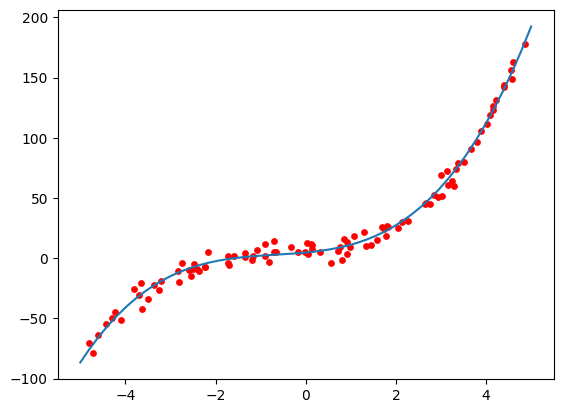

In [4]:
# use synthetic data x-y from data/polynomial.csv to do a linear regression

"""
Synthetic dataset information:
Features: 2 features x and y, y is the target
Number of instances: 100
It is generated by the following relationship:
    x ~ U(-5, 5)
    y(X) = 4 + 3 * x - 2 * x**2 + 1 * x**3 + ε
    ε ~ N(0, 5**2)
"""

# read csv file and split
dataset = pd.read_csv("data/polynomial.csv").to_numpy()
X, y = np.split(dataset, [1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# make pipeline (just like composite function) and train
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
pipe = make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree=3), model) # PolynomialFeatures(degree=3) expand
                                                                                # [x] to [1, x, x**2, x**3]
pipe.fit(X_train, y_train)

# test accuracy (not constant due to train_test_split)
print(f"accuracy: {pipe.score(X_test, y_test)}") # around 98%
print(f"coefficients: {model.coef_[0]}") # approximately [4. 3. 2. 1.], the first coefficient is β0 (y-intercept)

# draw data points and best fit curve by sampling
plt.scatter(X, y, s=15, c="red")
x_smaples = np.linspace(-5, 5)
plt.plot(x_smaples, pipe.predict(x_smaples.reshape((50, 1))))
plt.show()

98% accuracy is perfect, as you know the degree $ k $. What happens if you choose inproper degree $ k $?

**_Underfitting_** occurs when a mathematical model cannot adequately capture the underlying structure of the data.

An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing. Underfitting would occur, for example, when fitting a linear model to nonlinear data. Such a model will tend to have poor predictive performance.


accuracy: 0.8392579461668621
coefficients: [ 3.27913176 17.09621552  2.22378369]


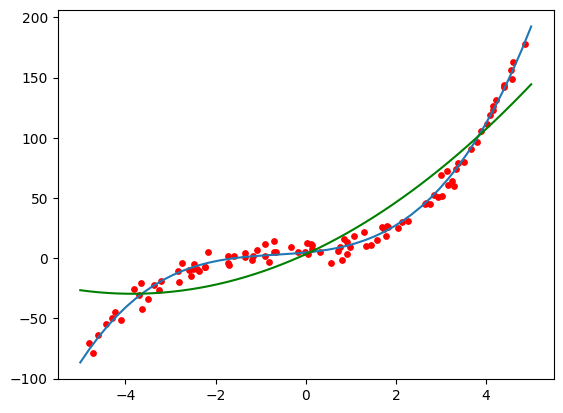

In [5]:
# degree = 2
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
pipe2 = make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree=2), model)
pipe2.fit(X_train, y_train)

# test accuracy
print(f"accuracy: {pipe2.score(X_test, y_test)}") # decreased to around 90%
print(f"coefficients: {model.coef_[0]}")

# draw data points and best fit curve by sampling
plt.scatter(X, y, s=15, c="red")
x_smaples = np.linspace(-5, 5)
plt.plot(x_smaples, pipe.predict(x_smaples.reshape((50, 1))))
plt.plot(x_smaples, pipe2.predict(x_smaples.reshape((50, 1))), "green")
plt.show()

**_Overfitting_** is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit to additional data or predict future observations reliably.

An overfitted model is a mathematical model that contains more parameters than can be justified by the data. In a mathematical sense, these parameters represent the degree of a polynomial. The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e., the noise) as if that variation represented underlying model structure.

accuracy: 0.9799505665860471
coefficients: [ 7.89001684e+00  1.69721905e+00 -9.75522520e-01  1.76624342e+00
 -8.75398949e-01  1.24205025e+00  1.23056022e+00 -8.22059067e-01
 -4.40173752e-01  2.01754417e-01  8.10388989e-02 -2.57626507e-02
 -8.79893213e-03  1.88156011e-03  5.83751487e-04 -7.93949541e-05
 -2.31992915e-05  1.80512821e-06  5.06060533e-07 -1.71481460e-08
 -4.64924432e-09]


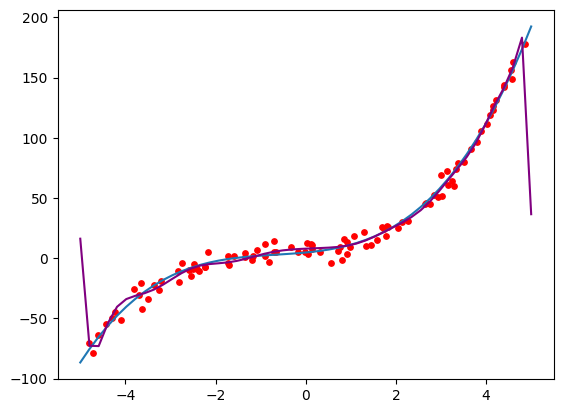

In [6]:
# degree = 20
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
pipe3 = make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree=20), model)
pipe3.fit(X_train, y_train)

# test accuracy (not constant due to train_test_split)
print(f"accuracy: {pipe3.score(X_test, y_test)}") # decreased to around 90%
print(f"coefficients: {model.coef_[0]}")

# draw data points and best fit curve by sampling
plt.scatter(X, y, s=15, c="red")
x_smaples = np.linspace(-5, 5)
plt.plot(x_smaples, pipe.predict(x_smaples.reshape((50, 1))))
plt.plot(x_smaples, pipe3.predict(x_smaples.reshape((50, 1))), "purple")
plt.show()

We can determine a proper degree $ k $ by experiments:

best: degree 5, accuracy 0.9881340478253828


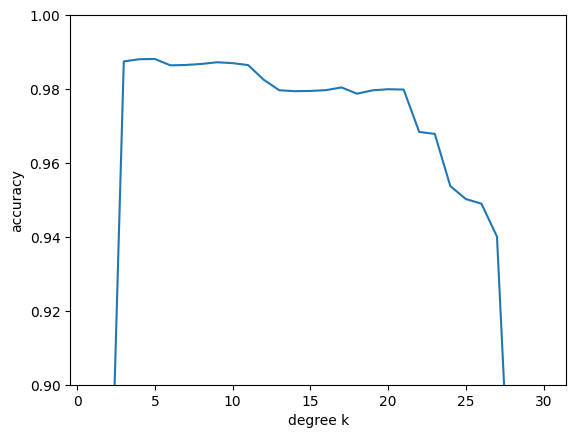

In [7]:
# test all degree 1 <= k <= 30
results = [make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree=k), model)
           .fit(X_train, y_train).score(X_test, y_test) for k in range(1, 31)]

# output best choice (usually k = 3)
print(f"best: degree {np.array(results).argmax() + 1}, accuracy {max(results)}")

# draw data points and best fit curve by sampling
plt.plot(range(1, 31), results)
plt.ylim(0.9, 1.0)
plt.xlabel("degree k")
plt.ylabel("accuracy")
plt.show()

## 5. Exercise: a real task

**_Data preprocessing_** can refer to manipulation, filtration or augmentation of data before it is analyzed.

The preprocessing pipeline used can often have large effects on the conclusions drawn from the downstream analysis. Thus, representation and quality of data is necessary before running any analysis.

- **_Data cleaning_**: remove outliars (mean square error has the disadvantage of heavily weighting outliers), fix missing values, remove duplicated data, ...

- **_Normalisation_**: rescale each feature such that it has a standard deviation of 1 and a mean of 0 (to ease the convergence or to create a completely different model fit compared to the fit with unscaled data).

Use a real dataset for prediction, normalise dataset by `StandardScaler` and then randomly divide dataset into 80% train and 20% test. Test accuracy on the test set to see what our linear regression can do.

accuracy: 0.7729300396388792


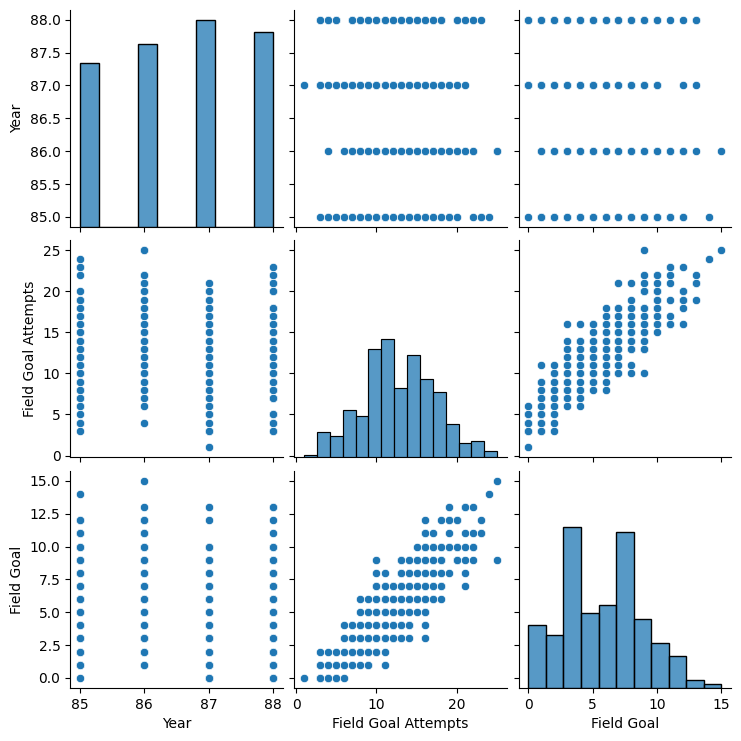

In [8]:
# use OpenML dataset "vinnie"

"""
Online dataset information:
Features: Year, Field Goal Attempts, Field Goal (target)
Number of instances: 380
https://www.openml.org/search?type=data&status=active&id=519
"""

# download dataset
dataset = sklearn.datasets.fetch_openml("vinnie", version=1, as_frame=True)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

# instantiate normaliser and linear regression model
pipe = make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression())

# fit train data
pipe.fit(X_train, y_train)

# test accuracy (around 80%)
print(f"accuracy: {pipe.score(X_test, y_test)}")

# pairplot
dataframe = pd.DataFrame(np.column_stack((dataset.data, dataset.target)),
                         columns=["Year", "Field Goal Attempts", "Field Goal"])
sns.pairplot(dataframe)
plt.show()

_Think: do you think the accuracy of this task is high or low, why?_

## 6. Linear Separability

In Euclidean geometry, linear separability is a property of two sets of points. This is most easily visualized in two dimensions (the Euclidean plane) by thinking of one set of points as being colored blue and the other set of points as being colored red. These two sets are linearly separable if there exists at least one line in the plane with all of the blue points on one side of the line and all the red points on the other side.

<img src="img/linearly_separable_red-blue_cropped.png" alt="Linear Separability" height=400px>

This idea immediately generalizes to higher-dimensional Euclidean spaces if the line is replaced by a hyperplane.

Mathematical definition: let $ X_0 $ and $ X_1 $ be two sets of points in an $ n $-dimensional Euclidean space. Then $ X_0 $ and $ X_1 $ are linearly separable if there exist $ z + 1 $ real numbers $ w_1, w_2, \ldots, w_z, c $, such that

$$
    \text{for all } x \in X_0: \sum_{k=1}^z w_kx_k > c \text{ and for all } x \in X_1: \sum_{k=1}^z w_kx_k < c \tag{6}
$$

where $ x_k $ is the $ k $-th component of $ x $.

## 7. Logistic regression

Logistic regression estimates the parameters of a logistic model (the coefficients in the linear or non linear combinations).

The logistic model transforms regressor matrix into probabilities of being classfied as each class.

#### **Mathematical definition**

We shall start with binomial logistic regression (classification with two classes). The logistic function is a **_sigmoid function_**, which takes any real input $ t $ and outputs a value between zero and one. The stardard logistic function $ σ: {\Bbb R} \to (0, 1) $ is defined as follows:

$$
    σ(t) = \frac{e^t}{e^t + 1} = \frac{1}{1 + e^{-t}} \tag{7}
$$

A graph of the logistic function on the $ t $-interval $ (−6, 6) $ is shown below:

![Logistic curver](img/logistic-curve.png)

Let's assume that $ t $ is a linear function of a single explanatory variable $ x $:

$$
    t = β_0 + β_1x \tag{8}
$$

So the general logistic function $ p: {\Bbb R} \to (0, 1) $ can be rewritten as

$$
    p(x) = σ(t) = \frac{1}{1 + e^{-(β_0 + β_1x)}} \tag{9}
$$

$ p(x) $ is interpreted as the probability of the dependent variable $ y $ equaling a success/case rather than a failure/non-case.

The inverse of the logistic function $ σ $:

$$
    σ^{-1}(p) = {\rm ln} \left( \frac{p}{1 - p} \right) = β_0 + β_1x \tag{10}
$$

Exponentiate both side:

$$
    \frac{p}{1 - p} = e^{β_0 + β_1x} \tag{11}
$$

This equation shows how the logistic model links logistic function to linear regression expression.

Extending equations $ (8) $ to $ (11) $ so that $ t $ is a linear function of multiple explanatory variables $ x_1, x_2, \ldots, x_k $:

$$
    \begin{align*}
        t &= β_0 + β_1x_1 + \cdots + β_kx_k \tag{12} \\
        p = σ(t) &= \frac{1}{1 + e^{-(β_0 + β_1x_1 + \cdots + β_kx_k)}} \tag{13} \\
        σ^{-1}(p) = {\rm ln} \left( \frac{p}{1 - p} \right) &=
            β_0 + β_1x_1 + \cdots + β_kx_k \tag{14}\\
        \frac{p}{1 - p} &= e^{β_0 + β_1x_1 + \cdots + β_kx_k} \tag{15}
    \end{align*}
$$

What about multinomial logistic regression (classification with multiple classes)?

In the following paragraphs, we only consider a single instance in the dataset so variable $ i $ and number of instances $ n $ are omitted, $ y $ becomes a single target value and

$$
    X = \begin{bmatrix} x_1 & x_2 & \cdots & x_k \end{bmatrix}, \qquad
    β = \begin{bmatrix} β_1 & β_2 & \cdots & β_m \end{bmatrix} =
        \begin{bmatrix}
            β_{11} & β_{21} & \cdots & β_{m1} \\
            β_{12} & β_{22} & \cdots & β_{m2} \\
            \vdots & \vdots & \ddots & \vdots \\
            β_{1k} & β_{2k} & \cdots & β_{mk}
        \end{bmatrix}
$$

It can be seen as a set of independent binomial logistic regressions. In the case that we have $ K $ explanatory variables and $ M $ classes, we can choose outcome $ M $ (the last outcome) as the pivot, other $ M − 1 $ outcomes are separately regressed against the pivot outcome (each pair has a set of coefficients $ β_m $).

$$
    \begin{align*}
        \text{for all } m = 1, \ldots, M - 1: \qquad
            \frac{\Pr(y = m)}{\Pr(y = M)} &= e^{β_{m0} + β_{m1}x_1 + \cdots + β_{mk}x_k} & \text{equation (15)} \\
        \frac{\Pr(y = m)}{\Pr(y = M)} &= e^{Xβ_m} & \text{fold} \\
        \Pr(y = m) &= \Pr(y = M)e^{Xβ_m} & \text{rearrange} \tag{16}
    \end{align*}
$$

where $ \Pr $ stands for **_probability mass function_** and $ \Pr(y = m) $ is the probability that the discrete random variable $ y $ is exactly equal to $ m $.

Using the fact that all $ M $ of the probabilities must sum to one, we find:

$$
    \begin{align*}
        \Pr(y = M) + \sum_{m=0}^{M - 1} \Pr(y = m) &= 1 \\
        \Pr(y = M) + \sum_{m=0}^{M - 1} \Pr(y = M)e^{Xβ_m} &= 1 & \text{substitute equation (16)} \\
        \Pr(y = M) \cdot (1 + \sum_{m=0}^{M - 1} e^{Xβ_m}) &= 1 \\
        \Pr(y = M) &= \frac{1}{1 + \sum_{m=0}^{M - 1} e^{Xβ_m}} \tag{17}
    \end{align*}
$$

And for probabilities of other classes:

$$
    \text{for all } t = 1, \ldots, M - 1: \qquad
        \Pr(y = t) = \frac{e^{Xβ_t}}{1 + \sum_{m=0}^{M - 1} e^{Xβ_m}} \tag{18}
$$

#### **Logistic loss**

Finding coefficient vector $ β $ for a logistic model is somehow different. The loss function used here is usually **_logistic loss_**, which is the negative **_log-likelihood_**.

The log-loss for the $ i $-th point $ \ell_i $ is:

$$
    \ell_i =
        \begin{cases}
            - \ln(p_i) & \text{if } y_i = 1 \\
            - \ln(1 - p_i) & \text{if } y_i = 0
        \end{cases} \tag{19}
$$

where $ p_i = p(X_i) $, the probability of $ y_i $ equaling a success case.

These two cases can be combined into a single expression:

$$
    \ell_i = - y_i \ln p_i - (1 - y_i) \ln (1 - p_i) \tag{20}
$$

This expression is more formally known as the **_cross-entropy_** of the predicted distribution $ (p_i, (1 − p_i)) $ from the actual distribution $ (y_i, (1 − y_i)) $, as probability distributions on the two-element space of (pass, fail).

And the overall loss:

$$
    \ell = \sum_{i=1}^N (- y_i \ln p_i - (1 - y_i) \ln (1 - p_i)) \tag{21}
$$

#### **Parameter estimation**

Again, we need to find partial derivatives of loss function over coefficients and let them equal to zero.

For a logistic model with $ K $ explanatory variables $ x_1, x_2, \ldots, x_k $:

$$
    \begin{align*}
        \ell &= \sum_{i=1}^N (- y_i \ln p_i - (1 - y_i) \ln (1 - p_i)) & \text{equation (21)}\\
        \text{for all } i = 1, \ldots, N: \qquad
            p_i &= \frac{1}{1+e^{-t_i}} \qquad 1 - p_i = \frac{1}{1+e^{t_i}}& \text{equation (7)} \\
        t_i &= β_0 + β_1x_{i1} + \cdots + β_kx_{ik} & \text{equation (8)} \\
        \text{for all } k = 1, \ldots, K: \qquad
            \frac{∂\ell}{∂β_k} &= \frac{∂\ell}{∂p_i} \cdot \frac{∂p_i}{∂t_i} \cdot \frac{∂t_i}{∂β_k} & \text{chain rule} \\
        0 &= \sum_{i=1}^N (- y_i \cdot \frac{1}{p_i} - (1 - y_i) (- \frac{1}{1 - p_i}))
            \cdot \frac{e^{t_i}}{(1 + e^{t_i})^2} \cdot x_{ik} \\
        0 &= \sum_{i=1}^N (- y_i (1 + e^{-t_i}) + (1 - y_i) (1 + e^{t_i}))
            \cdot \frac{e^{t_i}}{(1 + e^{t_i})^2} \cdot x_{ik} \\
        0 &= \sum_{i=1}^N (- y_i \cdot \frac{1}{1 + e^{t_i}} + (1 - y_i) \frac{e^{t_i}}{1 + e^{t_i}}) x_{ik} \\
        0 &= \sum_{i=1}^N (- y_i \cdot (1 - p_i) + (1 - y_i) \cdot p_i) x_{ik} \\
        0 &= \sum_{i=1}^N (p_i - y_i) x_{ik} \tag{22}
    \end{align*}
$$

The maximization procedure can be accomplished by solving the equation $ (22) $ for all ⁠$ β_0, β_1, \ldots, β_k $ by numerical methods, since $ \ell $ is nonlinear in ⁠⁠$ β_0, β_1, \ldots, β_k $⁠.

#### **Assumptions on dataset**

1. Linear separable.
2. No collinearity between explanatory variables.
3. Mutual (no instances are classified as more than one class).

accuracy: 0.9666666666666667


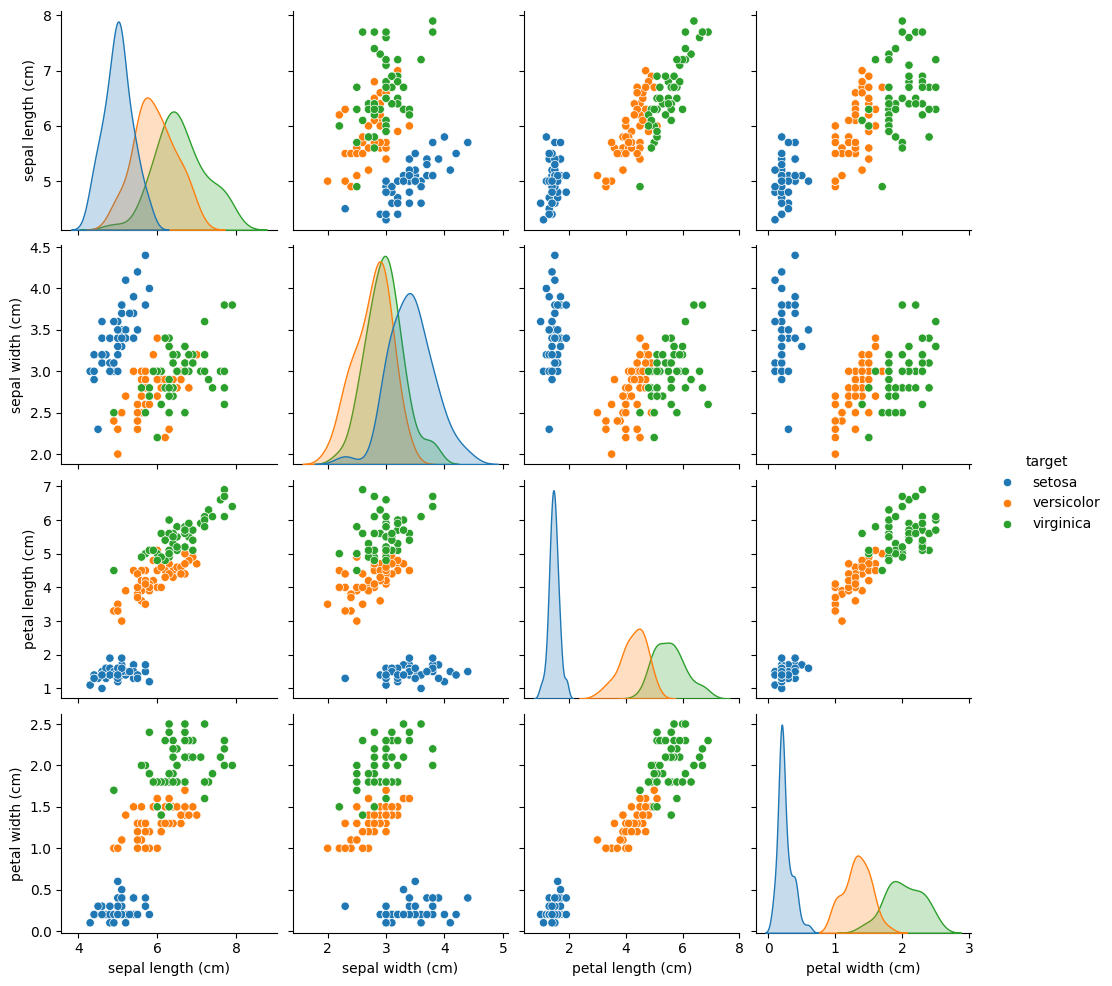

In [9]:
# use scikit-learn builtin dataset "iris"

"""
Builtin dataset information:
Features: sepal length, sepal width, petal length, petal width (all in centimeters), class (target)
Number of instances: 150 (50 per class)
"""

# load dataset
dataframe = sklearn.datasets.load_iris(as_frame=True)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(dataframe.data, dataframe.target, test_size=0.2)

# instantiate pipeline
pipe = make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LogisticRegression())

# fit train data
pipe.fit(X_train, y_train)

# test accuracy (around 95%)
print(f"accuracy: {pipe.score(X_test, y_test)}")

# rename classes using the iris target names
dataframe.frame["target"] = dataframe.target_names[dataframe.target]

# then you can plot the dataset using pairplot
sns.pairplot(dataframe.frame, hue="target")
plt.show()

If you forget to normalise data, you may get the following warning:
```text
...\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
```

_Think: what's the strengths and weaknesses of logistic regression (compared to the linear regression)?_

_Think: when shall we use the linear regression, when shall we use the logistic regression?_

# Wrap up

1. Loss function
    - mean square error (MSE)
    - logistic loss
2. Linear regression
    - categories: simple, multiple, polynomial and logistic
    - features and target
    - underfitting and overfitting
    - data preprocessing
    - linear separability